## Materi 3 Data Pre-Processing

tentang pandas, numpy scikit-learn
<a href="https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data"> **website untuk dataset climate**


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk

In [31]:
df = pd.read_csv('dataset/dailyDelhiClimateTest.csv')

In [32]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [33]:
df.shape

(114, 5)

#### Data Split

In [34]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) ###0.2 = 20%

In [36]:
print("Dimensi X_train : ", x_train.shape)
print("Dimensi X_test : ", x_test.shape)
print("Dimensi y_train : ", y_train.shape)
print("Dimensi y_text : ", y_test.shape)

Dimensi X_train :  (91, 4)
Dimensi X_test :  (23, 4)
Dimensi y_train :  (91,)
Dimensi y_text :  (23,)


#### Transformasi Data

1. Standarisasi

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss = StandardScaler()
Scaled_data = ss.fit_transform(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])

In [39]:
print("Nilai sebelum standarisasi")
print("Standar Deviasi : ", np.std(df))

Nilai sebelum standarisasi
Standar Deviasi :  meantemp         6.332115
humidity        18.984267
wind_speed       3.572278
meanpressure    89.081395
dtype: float64


C:\Users\PC-01\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


2. Normalisasi

In [40]:
print("Nilai setelah standarisasi")
print("Standar Deviasi : ", np.std(Scaled_data))

Nilai setelah standarisasi
Standar Deviasi :  1.0


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
min_max_scaler = MinMaxScaler()

In [43]:
x_scaler = min_max_scaler.fit_transform(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])

In [47]:
df2 = pd.DataFrame(x_scaler)

In [48]:
df2.head(5)

,0,1,2,3
0,0.209066,0.872396,0.075640,0.000000
1,0.319149,0.761651,0.084061,0.995298
2,0.260047,0.821416,0.146661,0.995356
3,0.327660,0.669797,0.176133,0.992624
4,0.314421,0.732480,0.106684,0.991206


In [49]:
import matplotlib.pyplot as plt

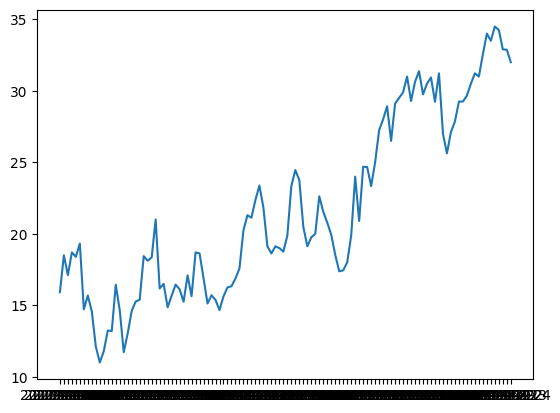

In [53]:
plt.plot(df.date, df.meantemp)
plt.show()

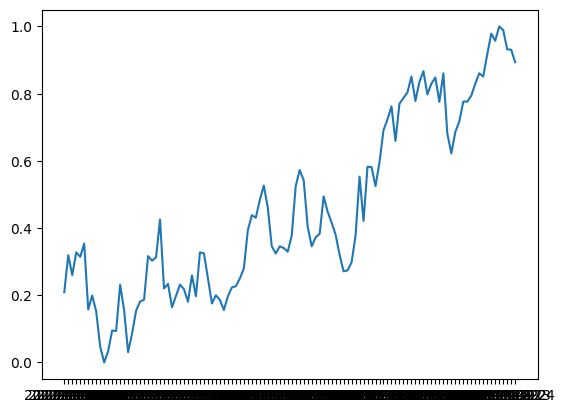

In [54]:
plt.plot(df.date, df2[0])
plt.show()

### Data Cleaning

In [57]:
dataset_rusak = pd.read_csv('dataset/DailyDelhiClimateTestRusak.csv')

In [58]:
dataset_rusak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      105 non-null    float64
 2   humidity      98 non-null     float64
 3   wind_speed    98 non-null     float64
 4   meanpressure  107 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [61]:
from sklearn.impute import SimpleImputer


In [72]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
imputer_constant = SimpleImputer(strategy='constant')

In [73]:
dataset_rusak_cleaned = dataset_rusak.copy()

In [74]:
dataset_rusak_cleaned.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [75]:
dataset_rusak_cleaned['meantemp'] = imputer_mean.fit_transform(dataset_rusak[['meantemp']])
dataset_rusak_cleaned['humidity'] = imputer_median.fit_transform(dataset_rusak[['humidity']])
dataset_rusak_cleaned['wind_speed'] = imputer_most_frequent.fit_transform(dataset_rusak[['wind_speed']])
dataset_rusak_cleaned['meanpressure'] = imputer_constant.fit_transform(dataset_rusak[['meanpressure']])

In [82]:
data_pembanding = pd.DataFrame(
    {
        "meantemp_clean":dataset_rusak_cleaned['meantemp'],
        "meantemp_original":dataset_rusak['meantemp'],
        "humidity_clean":dataset_rusak_cleaned['humidity'],
        "humidity_original":dataset_rusak['humidity'],
        "wind_speed_clean":dataset_rusak_cleaned['wind_speed'],
        "wind_speed_original":dataset_rusak['wind_speed'],
        "meanpressure_clean":dataset_rusak_cleaned['meanpressure'], ## tidak disarankan
        "meanpressure_original":dataset_rusak['meanpressure'], ## tidak disarankan
    }
)

In [83]:
data_pembanding.tail(30)

,meantemp_clean,meantemp_original,humidity_clean,humidity_original,wind_speed_clean,wind_speed_original,meanpressure_clean,meanpressure_original
84,29.100000,29.100000,37.100000,37.100000,17.590000,17.590000,1010.200000,1010.200000
85,29.500000,29.500000,38.625000,38.625000,13.650000,13.650000,1009.500000,1009.500000
86,29.888889,29.888889,40.666667,40.666667,8.844444,8.844444,1009.000000,1009.000000
87,31.000000,31.000000,34.500000,34.500000,13.200000,13.200000,1007.125000,1007.125000
88,29.285714,29.285714,36.857143,36.857143,10.585714,10.585714,1007.142857,1007.142857
89,30.625000,30.625000,37.625000,37.625000,6.950000,6.950000,1007.500000,1007.500000
90,31.375000,31.375000,35.125000,35.125000,9.037500,9.037500,1005.000000,1005.000000
91,21.001775,NaN,58.687500,NaN,1.387500,NaN,1004.250000,1004.250000
92,21.001775,NaN,58.687500,NaN,1.387500,NaN,1004.250000,1004.250000
93,21.001775,NaN,58.687500,NaN,1.387500,NaN,1007.200000,1007.200000


In [85]:
dataset_rusak_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [86]:
dataset_rusak_cleaned['meantemp'].astype('float32') # tidak merubah data

0      15.913043
1      18.500000
2      17.111111
3      18.700001
4      18.388889
         ...    
109    30.500000
110    31.222221
111    32.900002
112    32.875000
113    32.000000
Name: meantemp, Length: 114, dtype: float32

In [89]:
dataset_rusak_cleaned['meantemp'] = dataset_rusak_cleaned['meantemp'].astype('int64') # merubah data

In [90]:
dataset_rusak_cleaned['meantemp'].dtype

dtype('int64')

In [91]:
dataset_rusak.isna().sum()

date             0
meantemp         9
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [93]:
dataset_rusak_cleaned1 = dataset_rusak.copy()

In [94]:
dataset_rusak_cleaned1.isna().sum()

date             0
meantemp         9
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [97]:
dataset_rusak_cleaned1['meantemp'].fillna(dataset_rusak_cleaned1['meantemp'].mean(), inplace=True) ## sama dengan = ## mean bisa dirubah menjadi nilai yang diinginkan modus,median dll

In [98]:
dataset_rusak_cleaned1.isna().sum()

date             0
meantemp         0
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [103]:
dataset_rusak_cleaned1['humidity'].duplicated().sum()

20

In [106]:
dataset_rusak_cleaned1.drop_duplicates(inplace=True)

In [107]:
dataset_rusak_cleaned1.duplicated().sum()

0

In [116]:
nama = ['nama1', 'nama1','nama3', 'nama4']
umur = ['umur1', 'umur1', 'umur3', 'nama4']
kelas = ['1','1','3', '3']
test_df = pd.DataFrame(
    {
        'Nama' :nama,
        'Umur' :umur,
        'Kelas' :kelas
    }
)

In [117]:
test_df.head(5)

,Nama,Umur,Kelas
0,nama1,umur1,1
1,nama1,umur1,1
2,nama3,umur3,3
3,nama4,nama4,3


In [118]:
test_df.drop_duplicates(inplace=True)
test_df.head(5)

,Nama,Umur,Kelas
0,nama1,umur1,1
2,nama3,umur3,3
3,nama4,nama4,3


In [124]:
Nama = ['jupti', 'Erika', 'Sutiyo', 'Lanas', 'Majo', 'lili', 'teo', 'maras']
Jurusan = ['IF', 'sipil', 'IF', 'TF', 'KO', 'LP', 'LP', 'IF']

data_encoding = pd.DataFrame({
"Nama":Nama,
"Jurusan" : Jurusan,}
)

data_encoding.head(10)

,Nama,Jurusan
0,jupti,IF
1,Erika,sipil
2,Sutiyo,IF
3,Lanas,TF
4,Majo,KO
5,lili,LP
6,teo,LP
7,maras,IF


In [125]:
data_encoding_ordinal = data_encoding.copy()
data_encoding_onehot = data_encoding.copy()
data_encoding_ordinal['Jurusan'] = ordinal_encoder.fit_transform(data_encoding[['Jurusan']])
data_encoding['Jurusan'] = one_hot_encoder.fit_transform(data_encoding[['Jurusan']])

NameError: name 'ordinal_encoder' is not defined